In [29]:
import horton as ht
import numpy as np
from glob import glob
from matplotlib import pyplot as plt
%matplotlib inline

# Pure Horton interface

In [2]:
fchks = glob('fchk/*.fchk')

bohr2angstrom = 0.529177249
# load fchk files as horton molecule object
ht_mols = []
for f in fchks:
    ht_mols.append(ht.IOData.from_file(f))    

In [3]:
def cube_grid(R, margin=3, resolution=0.1):
    if margin is None:
        margin = 3
    if resolution is None:
        resolution = 0.1

    x_min, y_min, z_min = R.min(axis=0) - margin
    x_max, y_max, z_max = R.max(axis=0) + margin

    X, Y, Z = np.meshgrid(
        np.arange(x_min, x_max, resolution),
        np.arange(y_min, y_max, resolution),
        np.arange(z_min, z_max, resolution),
        indexing='ij'
    )

    # horton expect a 1D list of coordinates
    cube_grid = np.array(zip(X.ravel(), Y.ravel(), Z.ravel()))

    return cube_grid, X.shape

In [4]:
# get coordinate of ALL atoms to construct uniform grid
R_list = []
for mol in ht_mols:
    # horton coordinates are in bohr while g
    R_list.append(mol.coordinates * bohr2angstrom)
R_list = np.vstack(R_list)

grid, shape = cube_grid(R_list, margin=2, resolution=0.2)

In [5]:
rhos = []
for i, mol in enumerate(ht_mols[:2]):
    # get density matrix from horton object, extracted from fchk file
    density_matrix = mol.dm_full_scf
    print "processing %s" % fchks[i]
    # compute density value on each grid points for a given density matrix and basis function
    rhos.append(
        mol.obasis.compute_grid_density_dm(
            density_matrix, grid
        ).reshape(shape) # reshape backe to 3D array
    )

processing fchk/qm7_0648.fchk
processing fchk/qm7_0857.fchk


In [6]:
[rho.shape for rho in rhos]

[(64, 43, 36), (64, 43, 36)]

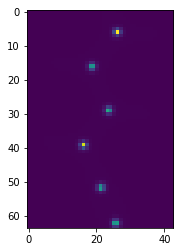

In [30]:
plt.imshow(rhos[0][:,:,18])

In [7]:
import qctoolkit as qtk

In [8]:
qtk_mols = []
for f in fchks:
    qtk_mols.append(qtk.QMInp(f, electron_repulsion=False))

backup molecule failed with err: no default __reduce__ due to non-trivial __cinit__. try horton
backup molecule failed with err: no default __reduce__ due to non-trivial __cinit__. try horton
backup molecule failed with err: no default __reduce__ due to non-trivial __cinit__. try horton
backup molecule failed with err: no default __reduce__ due to non-trivial __cinit__. try horton
backup molecule failed with err: no default __reduce__ due to non-trivial __cinit__. try horton
backup molecule failed with err: no default __reduce__ due to non-trivial __cinit__. try horton
backup molecule failed with err: no default __reduce__ due to non-trivial __cinit__. try horton
backup molecule failed with err: no default __reduce__ due to non-trivial __cinit__. try horton
backup molecule failed with err: no default __reduce__ due to non-trivial __cinit__. try horton
backup molecule failed with err: no default __reduce__ due to non-trivial __cinit__. try horton


In [9]:
ghs = qtk_mols[0].cube_grid(R=R_list, margin=2, resolution=0.2)

In [11]:
qtk_rhos = []
for mol in qtk_mols[:2]:
    qtk_rhos.append(mol.getRhoCube(grid_header_shape=ghs))

CUBE: center of mass on z-axis: 0.0 
CUBE: axis:2, slice:17.000000 
CUBE: slice coordinate: -0.072815 


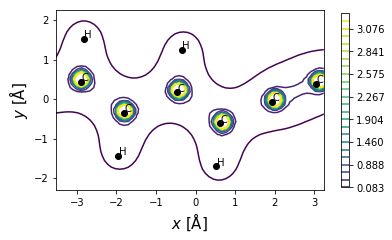

In [26]:
qtk_rhos[0].contour(axis=2, levels=np.log(np.linspace(0.01, 5, 30)**2))
pass